In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('/content/IRIS.csv')

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


# Features: all columns except last one
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Example: K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


K=1, Accuracy=1.0000
K=2, Accuracy=1.0000
K=3, Accuracy=1.0000
K=4, Accuracy=1.0000
K=5, Accuracy=1.0000
K=6, Accuracy=1.0000
K=7, Accuracy=0.9667
K=8, Accuracy=1.0000
K=9, Accuracy=1.0000
K=10, Accuracy=1.0000


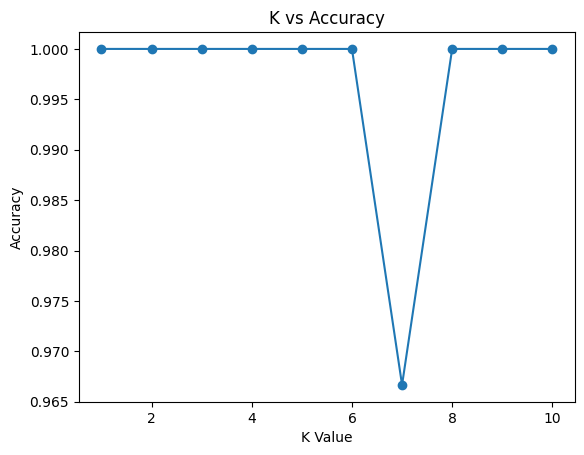

In [6]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

# Plot Accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()


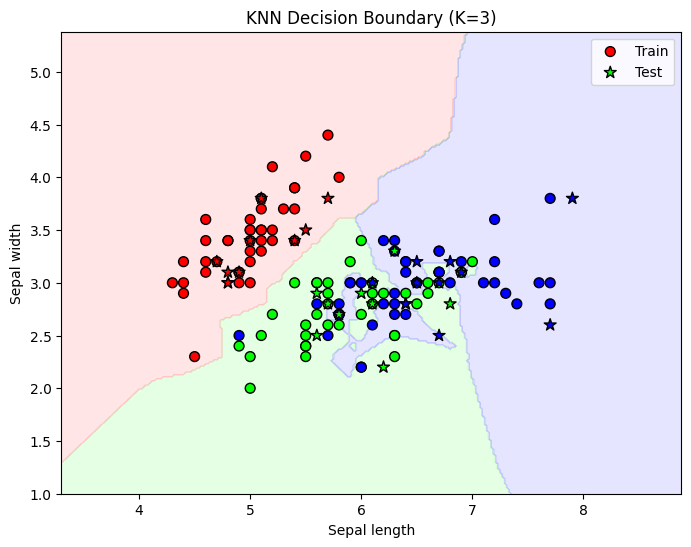

In [8]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Encode string labels to integers
label_enc = LabelEncoder()
y_2d_encoded = label_enc.fit_transform(df.iloc[:, -1].values)

# Take only first two features for 2D plotting
X_2d = df.iloc[:, [0, 1]].values

# Train-test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d_encoded, test_size=0.2, random_state=42
)

# Train KNN
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train_2d)

# Meshgrid for decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap=cmap_bold, edgecolor='k', s=50, label="Train")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, cmap=cmap_bold, edgecolor='k', s=80, marker='*', label="Test")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("KNN Decision Boundary (K=3)")
plt.legend()
plt.show()
